/var/folders/yh/076cnxbj4zd6l95zlpczlgvm0000gn/T/ipykernel_46717/943697196.py:76: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(im_out)
/var/folders/yh/076cnxbj4zd6l95zlpczlgvm0000gn/T/ipykernel_46717/943697196.py:77: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


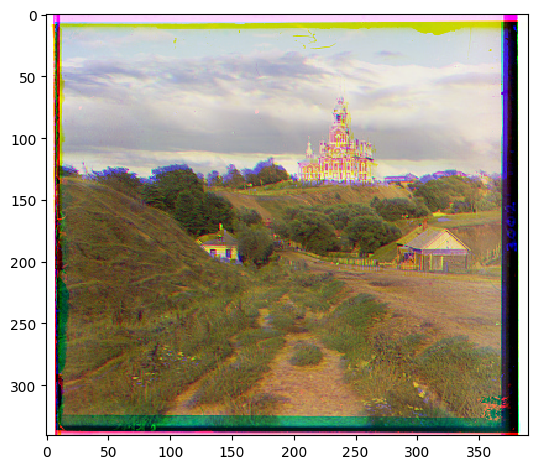

In [8]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio

#constants
method = 'ncc'

# L2-Norm/Euclidean Distance
def l2_norm(image1, image2):
    return np.sqrt(np.sum(np.sum((image1-image2)**2)))

# Normalized Cross Correlation
def ncc(image1, image2):
    return np.sum(image1 * image2) / (np.linalg.norm(image1) * np.linalg.norm(image2))
    
#Match image1 onto image2
def align(image1, image2, method='l2_norm', displacement_range=15):
    cur_best_diff = None
    cur_best_disp = None
    
    #fixed range of 15 pixels
    
    search_range = range(-displacement_range, displacement_range+1)

    for y in search_range:
        for x in search_range:
            rolled_image = np.roll(image1, (x,y), axis=(0,1))
            if (method == 'l2'):
                metric_result = -l2_norm(rolled_image, image2)
            if (method == 'ncc'):
                metric_result = ncc(rolled_image, image2)
    
            if cur_best_diff == None or metric_result > cur_best_diff:
                cur_best_diff = metric_result
                cur_best_disp = (x, y)

    aligned = np.roll(image1, cur_best_disp, axis=(0,1))
    return aligned, cur_best_disp

# name of the input file
imname = './cs180 proj1 data/cathedral.jpg'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)
im = sk.img_as_float(im)

# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

ag, ag_disp = align(g, b, method)
ar, ar_disp = align(r, b, method)
# create a color image
im_out = np.dstack([ar, ag, b])

# save the image
fname = 'out_fname.jpg'
#skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()